<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [3]:
#Task 1:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


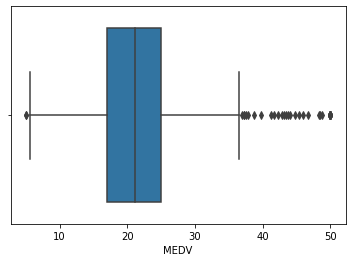

In [4]:
#Task 2: Generate Descriptive Statistics and Visualisations
#2.1
ax = sns.boxplot(x='MEDV', data=boston_df)

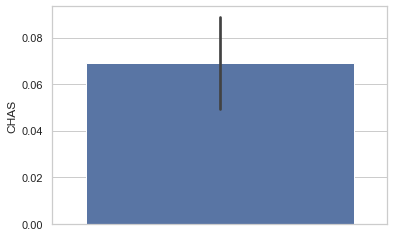

In [5]:
#Task 2: Generate Descriptive Statistics and Visualisations
#2.2
sns.set(style="whitegrid")
ax = sns.barplot(y="CHAS", data=boston_df)

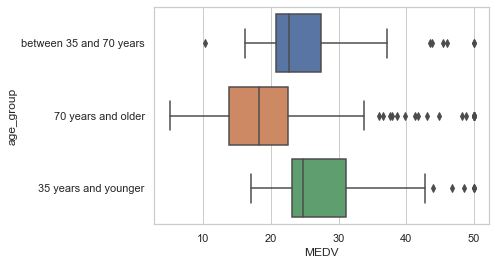

In [6]:
#Task 2: Generate Descriptive Statistics and Visualisations
#2.3
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

sns.set(style="whitegrid")
ax = sns.boxplot(x='MEDV', y="age_group", data=boston_df)

Conclusion: there is a positive correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town 


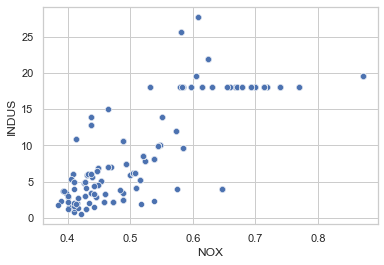

In [7]:
#Task 2: Generate Descriptive Statistics and Visualisations
#2.4
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
print("Conclusion: there is a positive correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town ")

C:\Users\anzam\Anaconda nav\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


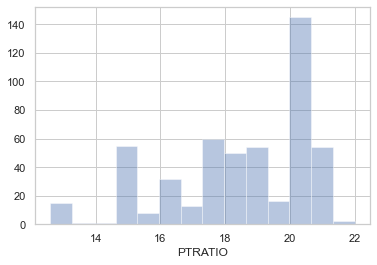

In [8]:
#Task 2: Generate Descriptive Statistics and Visualisations
#2.5
ax = sns.distplot(boston_df['PTRATIO'], kde = False)

In [9]:
#Task 3: Use the appropriate tests to answer the questions provided.
#3.1 Is there a significant difference in median value of houses bounded by the Charles river or not?
print("Hypothesis: There is a significant difference in median value of houses bounded by the Charles river")

Hypothesis: There is a significant difference in median value of houses bounded by the Charles river


In [10]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] ==  1]['MEDV'], equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

In [11]:
print("Conclusion: Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference median value of houses bounded by the Charles river")

Conclusion: Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference median value of houses bounded by the Charles river


In [12]:
##Task 3: Use the appropriate tests to answer the questions provided.
#3.2 Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)
print("Hypothesis: There is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940")

Hypothesis: There is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940


In [13]:
thrityfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(thrityfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


In [14]:
print("Conclusion: Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference median value of houses for each proportion of owner occupied units built prior to 1940")

Conclusion: Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference median value of houses for each proportion of owner occupied units built prior to 1940


In [15]:
##Task 3: Use the appropriate tests to answer the questions provided.
#3.3 Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?
print("Hypothesis: there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town")

Hypothesis: there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town


In [16]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209158, pvalue=7.91336106123623e-98)

In [17]:
print("Conclusion: Since the p-value is less than alpha value 0.05, we reject the null hypothesis and conclude that there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town")

Conclusion: Since the p-value is less than alpha value 0.05, we reject the null hypothesis and conclude that there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town


In [18]:
##Task 3: Use the appropriate tests to answer the questions provided.
#3.4 What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes
print("Hypothesis: there is impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes")

Hypothesis: there is impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes


In [19]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 18 Apr 2024   Prob (F-statistic):           1.21e-08
Time:                        09:43:14   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
print("Conclusion: Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is evidence that there is impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes")

Conclusion: Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is evidence that there is impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes
